<a href="https://colab.research.google.com/github/IsaelOliveira/Data-Sciente-Projects/blob/master/Projeto_3_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando WordCloud em Python utilizando dados do Airbnb

*by Isael Oliveira*

---

# Wordcloud

Wordcloud é também um tipo de visualização de dados muito poderosa, principalmente quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

Resumidamente, é como se você estivesse contando a frequência com que cada palavra aparece em um texto. Com essa frequência, você define tamanhos proporcionais às palavras, dispondo elas também em ângulos diferentes.

As palavras maiores são as que apareceram mais no texto, e as menores são as que menos apareceram. Além de ser extremamente útil para análises, é visualmente impactante, agregando valor a qualquer relatório ou notebook.

Uma dificuldade que temos é excluir palavras como artigos e pronomes da nossa análise. Uma vez que eles aparecem com frequência, podem tirar o protagonismo de palavras que de fato deveriam aparecer maiores.

Para conseguir desenhar uma wordcloud em Python, temos que instalar a biblioteca `wordcloud` na máquina. Vamos fazer isso e usar o *dataset* completo do Airbnb para o Rio de Janeiro.

## Importando dados do Airbnb

Você pode acessar diretamente no [Portal do Airbnb](http://insideairbnb.com/get-the-data.html) e fazer o download do arquivo. Se você preferir, você pode baixar os dados diretamente [neste link](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/data/listings.csv.gz).

<center><img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/airbnbprint.png" height="300px"></center>

Este *dataset* é muito maior que a sua versão resumida. Descompactado, tem mais de 100Mb, 35.793 entradas e 106 atributos! Vamos importar ele todo, mas só vou usar a coluna `summary`, que contém o resumo que o anfitrião escreveu sobre sua propriedade.

Vamos ver em uma nuvem de palavras quais as palavras mais frequentes que aparecem :)

In [35]:
# instalar wordcloud
!pip install wordcloud -q

In [36]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# importar o arquivo csv em um df
df = pd.read_csv("http://dl.dropboxusercontent.com/s/fdzigk974zbx2de/listings.csv?dl=0")

# eliminar as colunas com valores ausentes
summary = df.dropna(subset=['summary'], axis=0)['summary']

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
# ver as 5 primeiras entradas
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20190715155027,2019-07-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for Carni...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for Carni...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/67b13cea-8...,https://a0.muscache.com/im/pictures/67b13cea-8...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,$56.00,4,30,4,4,30,30,4.0,30.0,2 days ago,t,25,55,77,332,2019-07-16,233,23,2010-07-15,2019-06-30,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
1,25026,https://www.airbnb.com/rooms/25026,20190715155027,2019-07-16,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,NaN,NaN,https://a0.muscache.com/im/pictures/3003965/68...,NaN,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,70%,NaN,f,https://a0.muscache.com/im/pictures/9e204f80-1...,https://a0.muscache.com/im/pictures/9e204f80-1...,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,$45.00,4,30,4,4,30,30,4.0,30.0,2 weeks ago,t,24,54,77,352,2019-07-16,232,19,2010-06-07,2019-04-27,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.09
2,31560,https://www.airbnb.com/rooms/31560,20190715155027,2019-07-16,NICE & COZY 1BDR - IPANEMA BEACH,This nice

In [38]:
# exemplos de descrições para os imóveis no Airbnb
display(summary.iloc[100])
display(summary.iloc[120])
display(summary.iloc[133])

'Ambiente tranquilo e familiar,ótimo para viajantes que no final do dia queiram descansar e ter uma noite tranquila. Excelente bairro que fica próximo a Lagoa Rodrigo de Freitas, que é um dos lindos cartões postais de nossa cidade. Aguardo você!'

'O quarto é lindo e bem grande e possui acesso para a varanda do apartamento. Possui grandes armários,  bancada. Esse é o quarto maior de um apartamento/cobertura de 150m2 que possui 3 quartos, sala, varandas em torno de todo o apartamento, cozinha ampla com dependências. Esse quarto não possui banheiro privativo. Os hospedes desse quarto compartilham o banheiro com as pessoas que estiverem utilizando o segundo quarto. O terceiro quarto é a suíte que normalmente é utilizada por mim e meu marido.'

'Aconchegante, amplo, básico, arejado, iluminado com luz natural em prédio seguro e familiar. Prédio com portaria 24 horas e cameras de segurança em todos os andares do edifício. Tudo isto em Copacabana a quase 1 quadra do mar! É o segundo prédio da segunda quadra da praia!!! Está localizado na Av. Prado Junior quase esquina com Av. N.Sra de Copacabana!'

A coluna em questão (onde tem dados que foram preenchidos por usuários) é a coluna summary!

Para fazer nossa wordcloud, eu irei eliminar as linhas contendo valores ausente dessa coluna, uma vez que elas não servirão para nada.

In [39]:
# ver a quantidade de valores ausentes
print("Valores ausentes para summary: ", df.summary.isnull().sum())

# eliminar as colunas com valores ausentes
summary = df.dropna(subset=['summary'], axis=0)['summary']

Valores ausentes para summary:  1747


Basicamente, eu apenas eliminei os valores nulos da coluna summary e atribui a Series a outra variável. Para criar a wordcloud, vou concatenar todas as strings, como se fosse uma linha única.

In [40]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 9823645


Agora sim, vamos para a biblioteca wordcloud. A primeira etapa consiste em criar uma lista de stopword, que basicamente são palavras que devem ser removidas da wordcloud, como "a", "não", "mas", "and", "I", "not", etc.

Na sequência, segue o comando para gerar a nuvem, seguindo as orientações da documentação oficial do pacote.

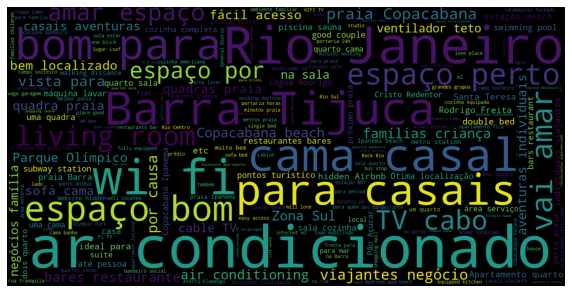

In [41]:
# lista de stopword
stopwords = set(STOPWORDS) #palavras mais comuns em inglês
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"]) #alguns outros em br

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png");

Eu que odeio o calor tenho que concordar com essa nuvem de palavras: ar condicionado é a coisa mais importante para quem aluga uma casa no Rio de Janeiro :)

## Criar uma WordCloud sobre uma imagem

Apenas essa nuvem já seria suficiente para uma análise. No entanto, se você quiser gerar um efeito visual a mais, saiba que é possível usar imagens como máscara nas wordclouds.

Uma vez que eu estou falando de Rio de Janeiro, que tal plotar as palavras sobre uma imagem do Cristo Redentor, símbolo da cidade?!

<p align=center><img src="http://sigmoidal.ai/wp-content/uploads/2019/10/24585310_l-2.jpg" width="200px"></p>

O `wordcloud` analisa as intensidades dos *pixels* e considera o que está em preto como área para desenhar as palavras. Vou importar a figura acima e vamos ver o resultado na prática!

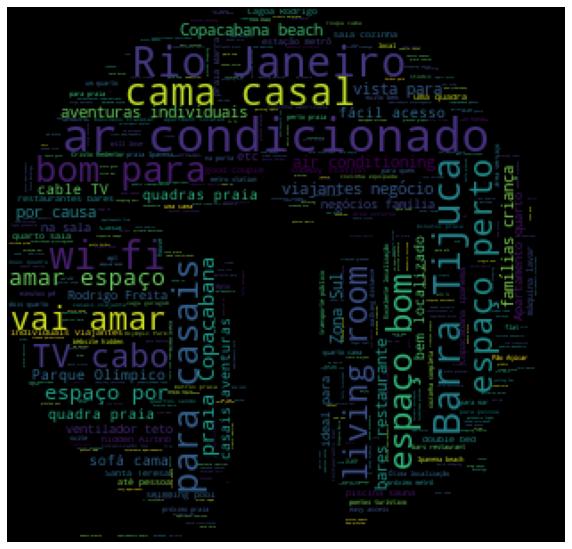

In [42]:
# endereço LOCAL da SUA imagem
rio_mask = np.array(Image.open("/content/cristo.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")